<a href="https://colab.research.google.com/github/hibanashid/EVmarketAnalysis/blob/main/EVdataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA        98122        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA        98021        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA        98109        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA        98027        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA        98392        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [ ]:
ev_data.shape

(60960, 17)

In [ ]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60960 entries, 0 to 60959
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         60960 non-null  object 
 1   County                                             60960 non-null  object 
 2   City                                               60960 non-null  object 
 3   State                                              60960 non-null  object 
 4   Postal Code                                        60960 non-null  int64  
 5   Model Year                                         60960 non-null  int64  
 6   Make                                               60960 non-null  object 
 7   Model                                              60960 non-null  object 
 8   Electric Vehicle Type                              60960 non-null  object 
 9   Clean 

In [ ]:
ev_data.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
ev_data.dropna(axis=0,inplace=True)

In [ ]:
ev_data.duplicated().sum()

0

In [ ]:
# Top 10 Electric Vehicle Makes
ev_counts_by_make = ev_data['Make'].value_counts().nlargest(10)
ev_counts_by_make

,count
Make,
TESLA,28077
NISSAN,4764
CHEVROLET,4295
BMW,2728
FORD,2482
KIA,2399
TOYOTA,1968
VOLKSWAGEN,1661
JEEP,1626


<ipython-input-13-e9da1fe2c914>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_counts_by_make.values, y=ev_counts_by_make.index, palette="viridis")


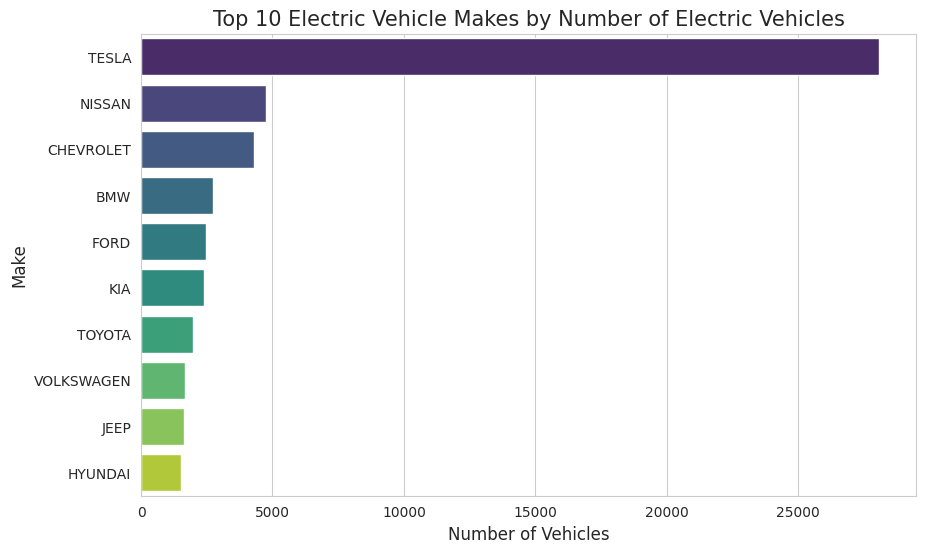

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_counts_by_make.values, y=ev_counts_by_make.index, palette="viridis")
plt.title('Top 10 Electric Vehicle Makes by Number of Electric Vehicles', fontsize=15)
plt.xlabel('Number of Vehicles', fontsize=12)
plt.ylabel('Make', fontsize=12)
plt.show()

The visualization highlights Tesla as the leading brand in the electric vehicle market, followed by Nissan and Chevrolet, underscoring Tesla's dominance and popularity over other brands.

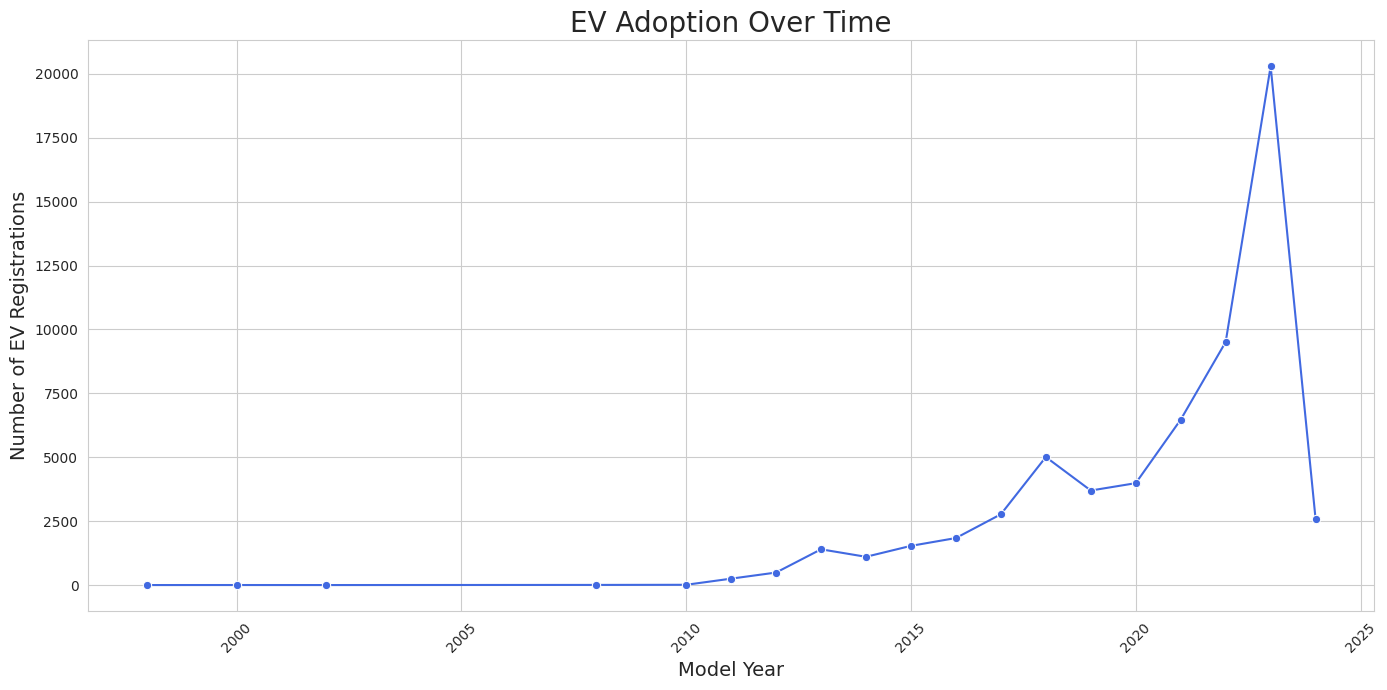

In [ ]:
sns.set_style("whitegrid")
ev_adoption_over_time = ev_data['Model Year'].value_counts().sort_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x=ev_adoption_over_time.index, y=ev_adoption_over_time.values, marker='o', color='royalblue')
plt.title('EV Adoption Over Time', fontsize=20)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of EV Registrations', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The "EV Adoption Over Time" visualization illustrates a notable rise in electric vehicle registrations, beginning in the early 2010s and accelerating into the 2020s. Recent years exhibit exponential growth in EV adoption, indicating a surge in popularity and a shift toward widespread acceptance.

In [ ]:
ev_count_distribution = ev_data.groupby('County')['VIN (1-10)'].count().reset_index().sort_values(by='VIN (1-10)', ascending=False)
top_ev_counties = ev_count_distribution.head(20)

<ipython-input-16-fd127632422b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIN (1-10)', y='County', data=top_ev_counties, palette='viridis')


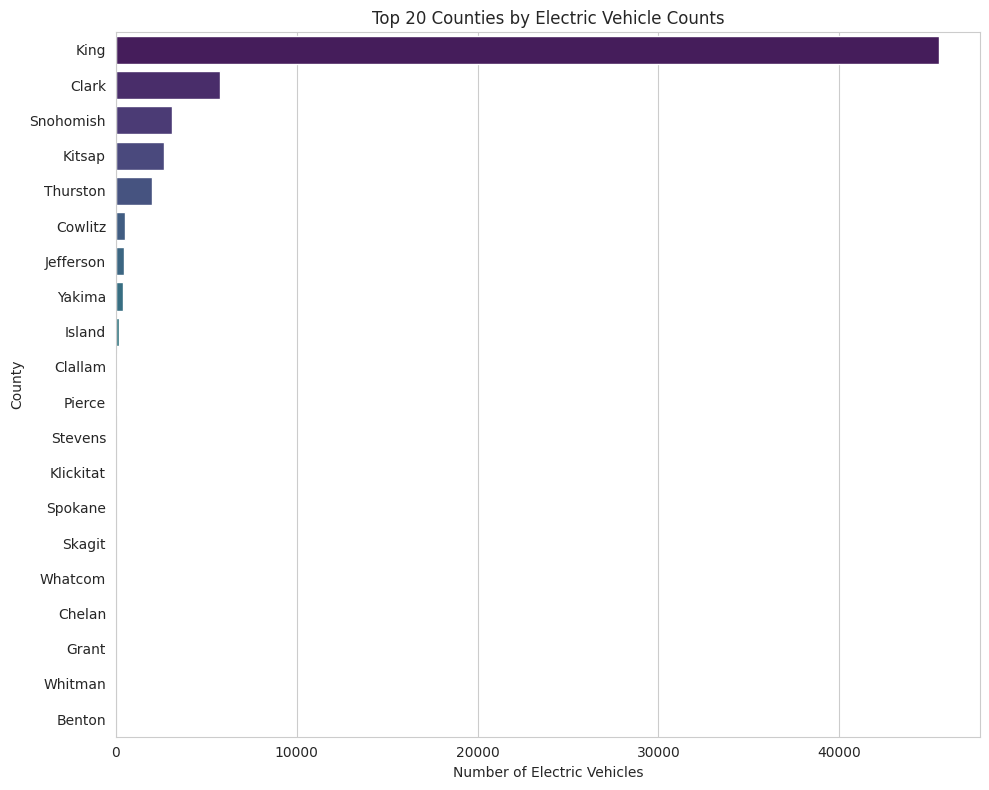

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='VIN (1-10)', y='County', data=top_ev_counties, palette='viridis')
plt.title('Top 20 Counties by Electric Vehicle Counts')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.tight_layout()
plt.show()

The visualization highlights King County as the leading region in electric vehicle adoption, followed by others like Snohomish and Pierce counties.

In [ ]:
# Filtering the dataset to include only BEVs and PHEV
ev_types_df = ev_data[ev_data['Electric Vehicle Type'].isin(['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'])]

# Grouping the data by model year electric vehicle and counts
yearly_ev_counts = ev_types_df.groupby(['Model Year', 'Electric Vehicle Type']).size().unstack(fill_value=0).reset_index()# Filtering the dataset to include only BEVs and PHEV
ev_types_df = ev_data[ev_data['Electric Vehicle Type'].isin(['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'])]

# Grouping the data by model year electric vehicle and counts
yearly_ev_counts = ev_types_df.groupby(['Model Year', 'Electric Vehicle Type']).size().unstack(fill_value=0).reset_index()

<Figure size 1400x800 with 0 Axes>

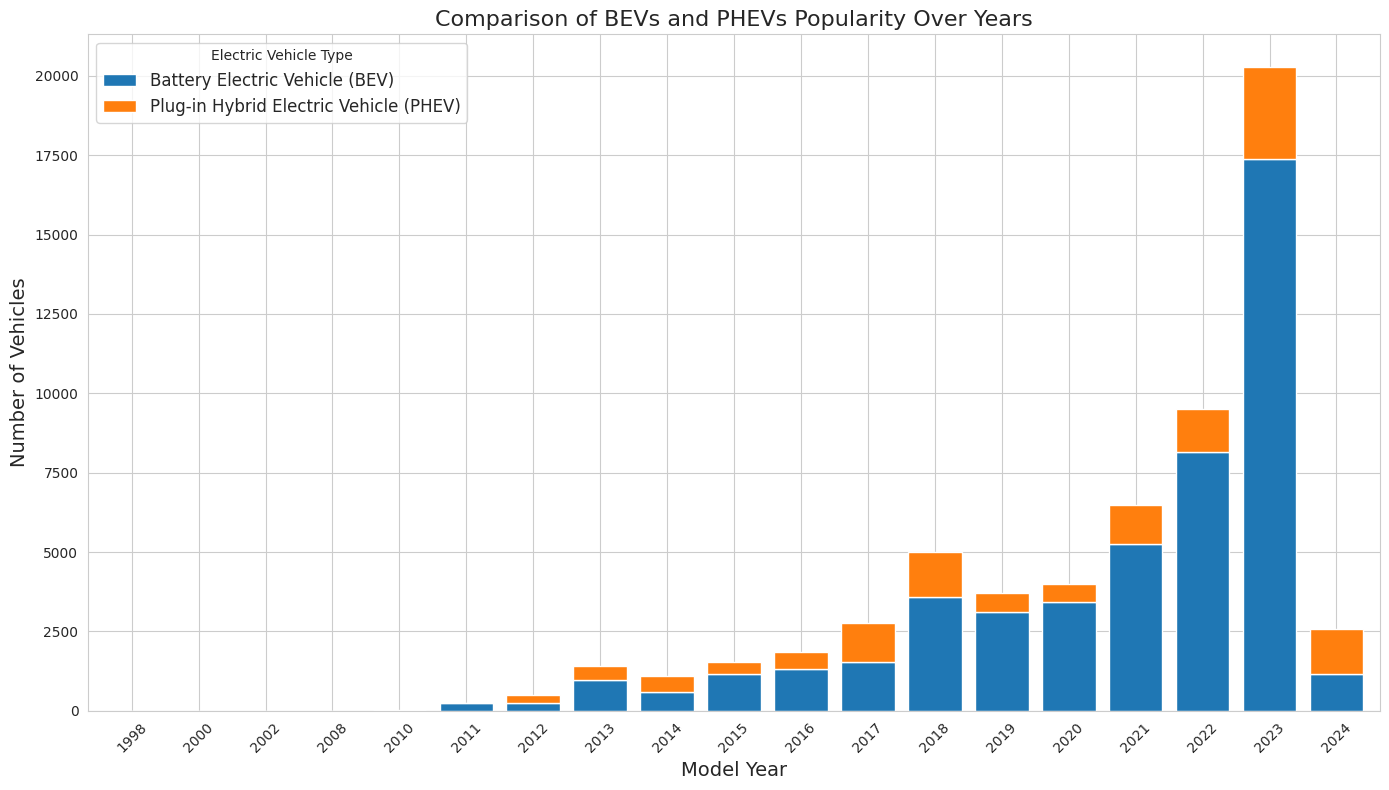

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
yearly_ev_counts.plot(kind='bar', stacked=True, x='Model Year', figsize=(14, 8), width=0.8)
plt.title('Comparison of BEVs and PHEVs Popularity Over Years', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type', fontsize=12)
plt.tight_layout()
plt.show()

The comparison between Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) over the years highlights a clear trend towards BEVs gaining popularity particularly in year 2023.

In [ ]:
# Distribution of Electric Vehicle Prices Over the Years

# Filtering out rows where Base MSRP is zero or high
filtered_df = ev_data[(ev_data['Base MSRP'] > 0) & (ev_data['Base MSRP'] < 200000)]

<ipython-input-21-472079a369f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Model Year', y='Base MSRP', palette="viridis")


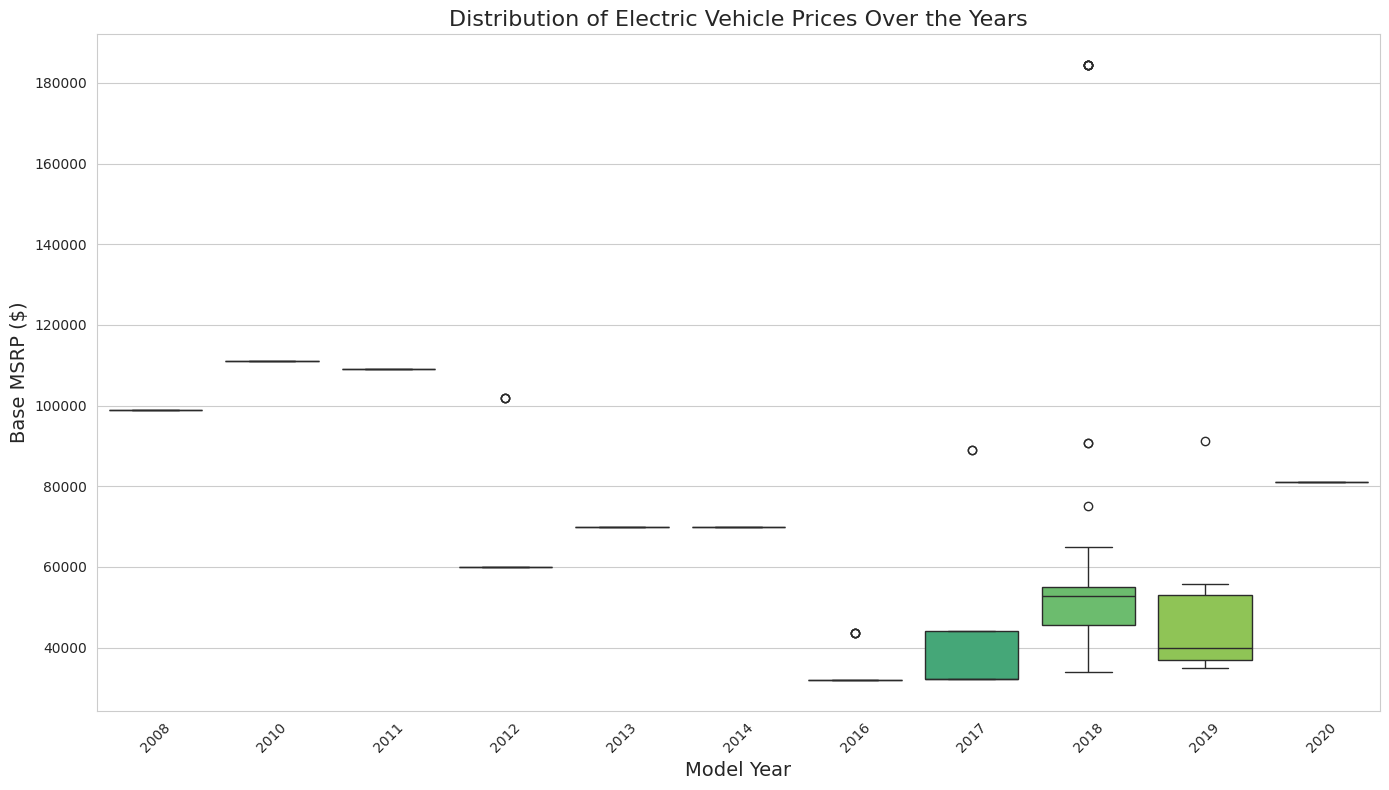

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='Model Year', y='Base MSRP', palette="viridis")
plt.title('Distribution of Electric Vehicle Prices Over the Years', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Base MSRP ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The visualization reveals an increase in the median price of electric vehicles over the years. However, prices between 2008 and 2011 were significantly higher compared to current levels, indicating a gradual reduction in costs over time.

In [ ]:
# Distribution of Electric Vehicle Prices by Top10 Make

top_makes = filtered_df['Make'].value_counts().nlargest(10).index
filtered_top_makes_df = filtered_df[filtered_df['Make'].isin(top_makes)]

<ipython-input-24-81a9b35739b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_top_makes_df, x='Make', y='Base MSRP', palette="coolwarm",hue=None)


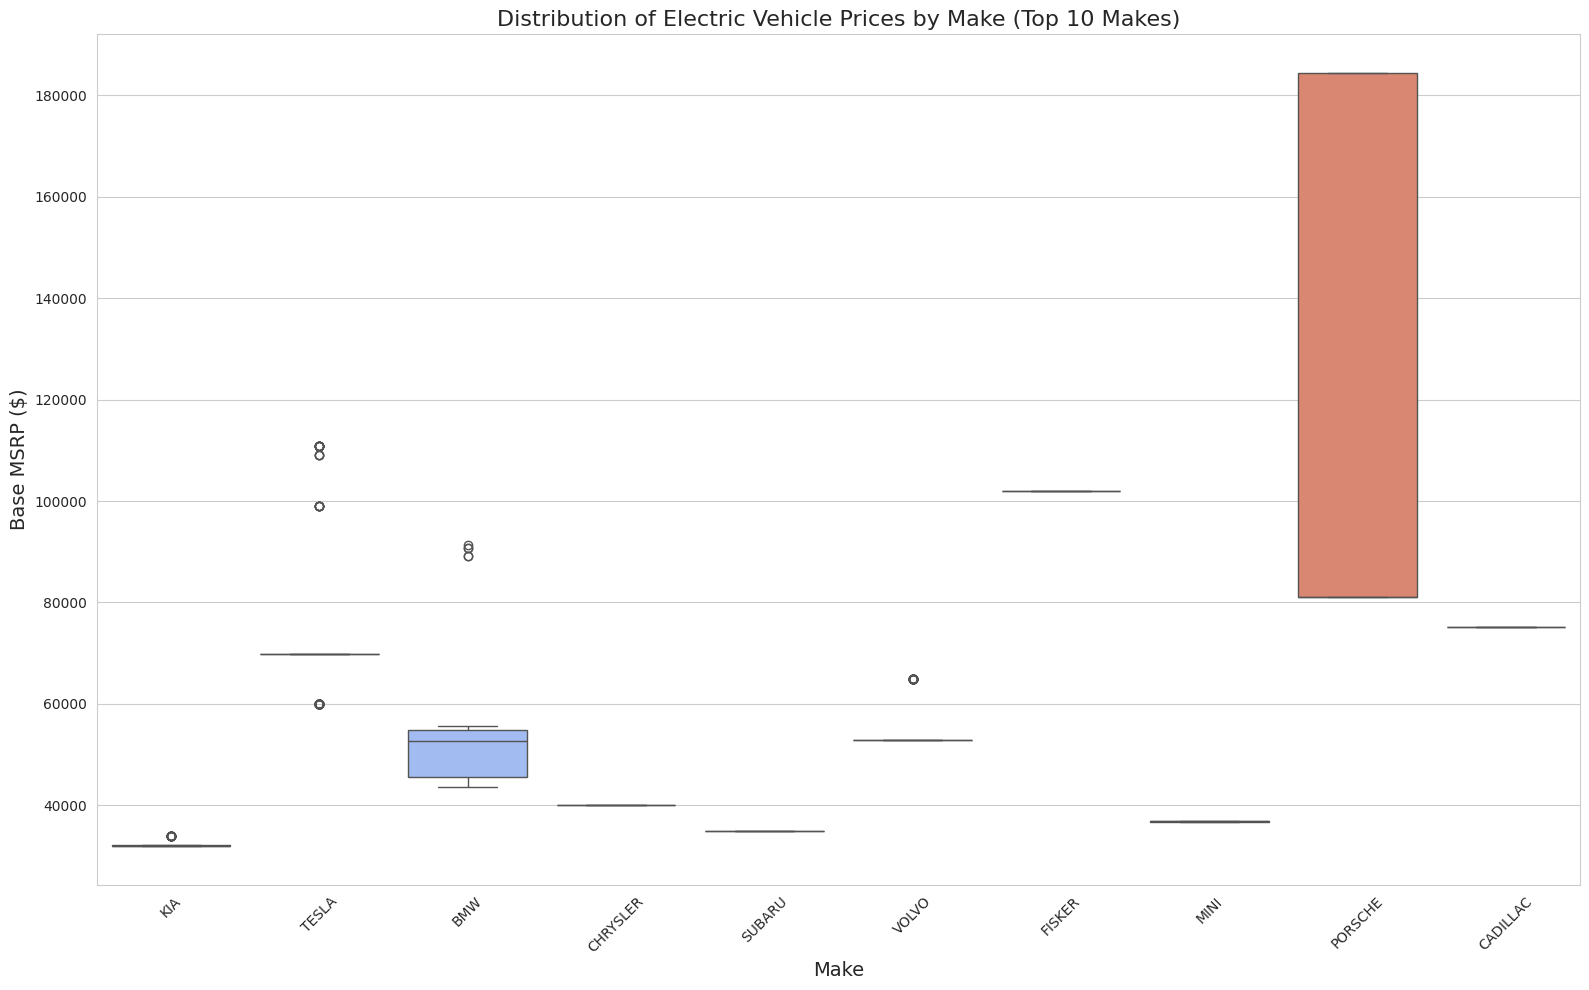

In [ ]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=filtered_top_makes_df, x='Make', y='Base MSRP', palette="coolwarm",hue=None)
plt.title('Distribution of Electric Vehicle Prices by Make (Top 10 Makes)', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Base MSRP ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-31-8beaa86ee140>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=utility_counts_sorted, x='DOL Vehicle ID', y='Electric Utility', palette='viridis', order=utility_counts_sorted['Electric Utility'])


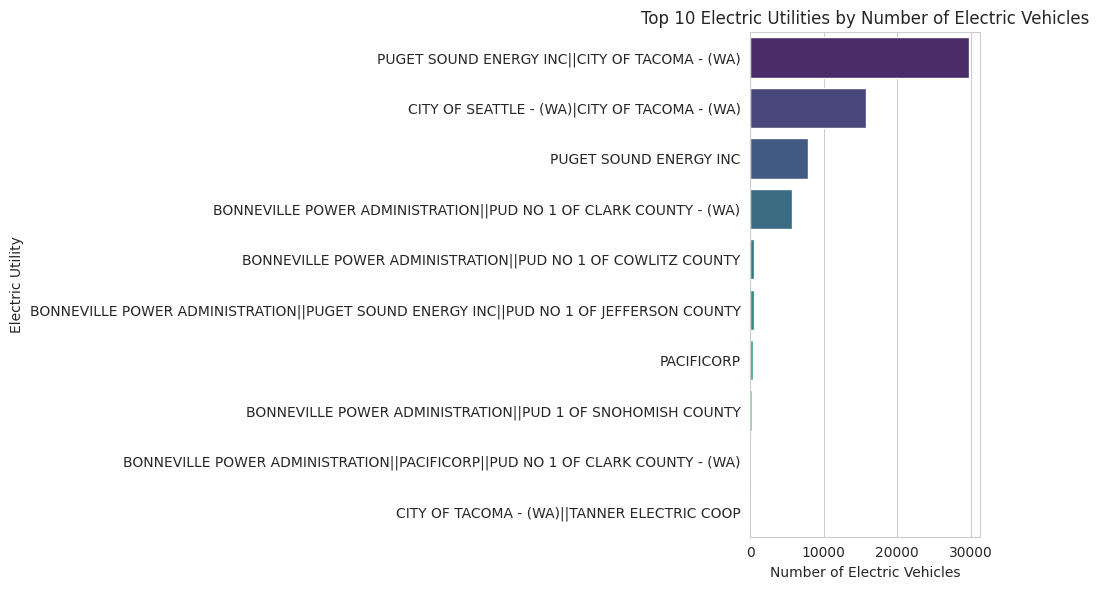

In [ ]:
utility_counts = ev_data.groupby('Electric Utility')['DOL Vehicle ID'].count().reset_index()
utility_counts_sorted = utility_counts.sort_values(by='DOL Vehicle ID', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=utility_counts_sorted, x='DOL Vehicle ID', y='Electric Utility', palette='viridis', order=utility_counts_sorted['Electric Utility'])

plt.title('Top 10 Electric Utilities by Number of Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Electric Utility')
plt.tight_layout()
plt.show()

The bar chart shows the electric utilities by number of vechicels. Puget sound energy inc. has the highest number of electric vechicles.